In [1]:
from ema_workbench.analysis import prim
from ema_workbench import load_results
from sklearn import preprocessing
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ACTOR = "genscen_Deventer_50000_07-06-2021-18-18-21.tar.gz"

In [3]:
experiments, outcomes = load_results("data/generated/" + ACTOR)
dike_model, planning_steps = get_model_for_problem_formulation("Deventer")
uncertainties = [uncertainty.name for uncertainty in dike_model.uncertainties]
x = experiments[uncertainties]
outcomes_df = pd.DataFrame(outcomes)

In [4]:
outcomes_df.columns.values.tolist()

['A.5_Expected Annual Damage', 'A.5_Expected Number of Deaths']

In [5]:
DAMAGE = outcomes_df.columns[0]
DEATHS = outcomes_df.columns[1]

In [7]:
outcomes_df.describe(percentiles=np.arange(0, 1, 0.1))

,A.5_Expected Annual Damage,A.5_Expected Number of Deaths
count,5.000000e+04,50000.000000
mean,1.847744e+08,0.169428
std,2.759496e+08,0.245505
min,0.000000e+00,0.000000
0%,0.000000e+00,0.000000
10%,0.000000e+00,0.000000
20%,0.000000e+00,0.000000
30%,0.000000e+00,0.000000
40%,1.990540e+07,0.019174
50%,5.833464e+07,0.055686


In [13]:
prim_algs = {}
for outcome in outcomes_df.columns:
    #code block below performs a rotation of data
#     x_numeric = x.select_dtypes(exclude=pd.CategoricalDtype)
#     x_categorical = x.select_dtypes(include=pd.CategoricalDtype)
#     rotated_experiments, rotation_matrix = prim.pca_preprocess(x_numeric, conditional(outcome))
#     rotated_x = pd.concat([rotated_experiments, x_categorical], axis=1)
#     rotated_x.columns = x_numeric.columns.tolist() + x_categorical.columns.tolist()
#     x = rotated_x
    
    prim_algs[outcome] = prim.Prim(x,  outcomes_df[outcome] > np.percentile(a=outcomes[DEATHS], q=90), threshold=0.8)

In [14]:
boxes = {}
for key in outcomes_df.columns:
    print(key)
    boxes[key] = prim_algs[key].find_box()

A.5_Expected Annual Damage
A.5_Expected Number of Deaths


A.5_Expected Annual Damage


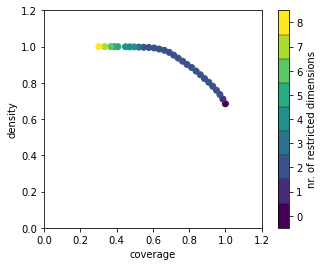

A.5_Expected Number of Deaths


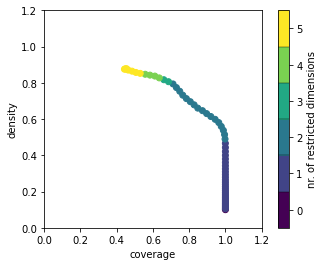

In [15]:
for key, box in boxes.items():
    print(key)
    box.show_tradeoff()
    plt.show()

# Trying around to find the right box

In [17]:
box_id=51
BOX = DEATHS

coverage      0.6106
density     0.837356
id                51
mass         0.07292
mean        0.837356
res_dim            4
Name: 51, dtype: object

             box 51                                          
                min       max                       qp values
A.5_pfail  0.000016  0.157393                     [-1.0, 0.0]
A.4_pfail  0.484481  0.999999  [6.159200521858934e-228, -1.0]
A.3_pfail  0.051395  0.999988     [0.02070238560622311, -1.0]
A.2_pfail  0.043973  0.999985    [0.051776936235193485, -1.0]



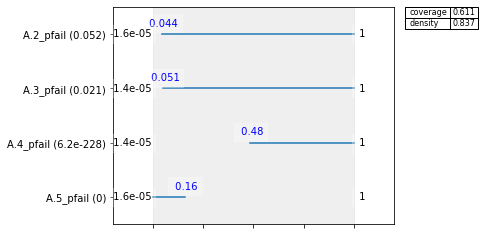

In [18]:
boxes[BOX].inspect(box_id)
boxes[BOX].inspect(box_id, style='graph')
plt.show()

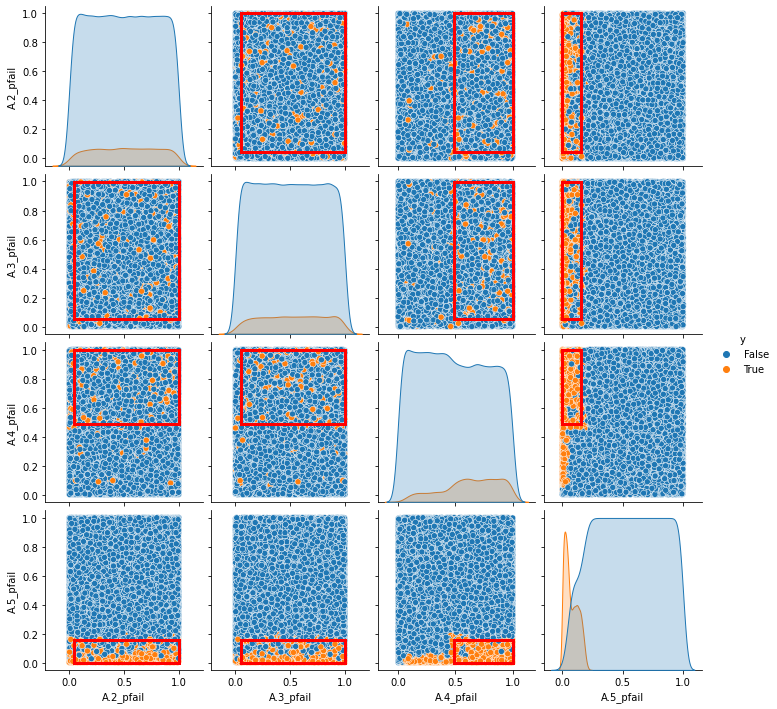

In [19]:
boxes[BOX].select(box_id)
boxes[BOX].show_pairs_scatter()
plt.show()

In [20]:
lims = boxes[BOX].box_lims[box_id]